In [70]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'C:\Users\jyoti\Documents\Course\Online_Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Exploration

In [11]:
data['CustomerID'] = data['CustomerID'].astype('str')

In [12]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


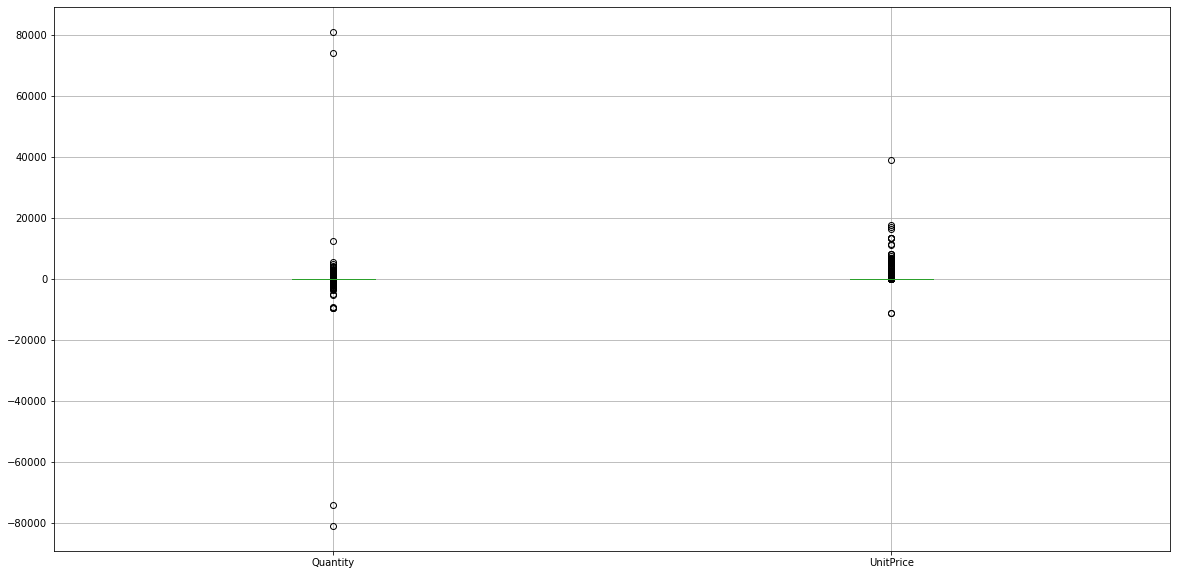

In [24]:
data.boxplot(figsize = (20,10))
plt.show()

In [55]:
# Spend per customer
data['Revenue'] = data['Quantity']*data['UnitPrice']

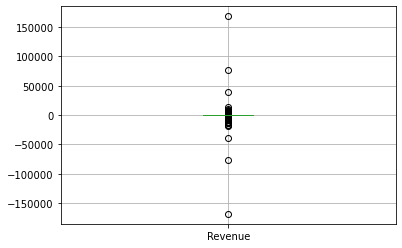

In [63]:
data.boxplot(column = ['Revenue'])
plt.show()

# Can we say using this that a lot of customers return a good proportion of what they buy?

In [16]:
# Data time span
print(data['InvoiceDate'].min(), ",", data['InvoiceDate'].max())

2010-12-01 08:26:00 , 2011-12-09 12:50:00


In [22]:
## Checking for negative or zero quantity
print(data[data['Quantity'] < 0].shape)
print(data[data['Quantity'] == 0].shape)

(10624, 8)
(0, 8)


In [18]:
## Checking for negative or zero unit price
print(data[data['UnitPrice'] < 0].shape)
print(data[data['UnitPrice'] == 0].shape)

(2, 8)
(2515, 8)


In [25]:
## Records with negative price. Could be price adjustments.
data[data['UnitPrice'] < 0]

# Seems like these records are price adjustments for accounting purposes as description says 'Adjust bad debt' and no customer is related to it 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


## Product analysis

In [21]:
## Products with 0 price
data[data['UnitPrice'] == 0]['Description'].unique().shape

(377,)

In [38]:
## Products with negative quantity. Are these reversals?
print(data[data['Quantity'] < 0].shape)
print(data[data['Quantity'] < 0]['Description'].unique().shape)
print(data[data['Quantity'] < 0]['Description'].unique())
print(data[(data['Quantity'] < 0) & (data['Description'] == 'Discount')].shape)

(10624, 8)
(2111,)
['Discount' 'SET OF 3 COLOURED  FLYING DUCKS'
 'PLASTERS IN TIN CIRCUS PARADE ' ... 'SMALL SQUARE CUT GLASS CANDLESTICK'
 'HOUSE SHAPE PENCIL SHARPENER' 'PAPER CRAFT , LITTLE BIRDIE']
(77, 8)


In [41]:
data[(data['Quantity'] < 0) & (data['Description'] == 'Discount')]['StockCode'].unique()

array(['D'], dtype=object)

#### Revenue from each product

In [71]:
product_rev = data.groupby('Description')['Revenue'].mean()
product_rev

Description
20713                              0.000000
 4 PURPLE FLOCK DINNER CANDLES     7.092683
 50'S CHRISTMAS GIFT BAG LARGE    18.008692
 DOLLY GIRL BEAKER                15.925414
 I LOVE LONDON MINI BACKPACK      18.501932
                                    ...    
wrongly marked carton 22804        0.000000
wrongly marked. 23343 in box       0.000000
wrongly sold (22719) barcode       0.000000
wrongly sold as sets               0.000000
wrongly sold sets                  0.000000
Name: Revenue, Length: 4223, dtype: float64

In [67]:
(data.groupby('Description')['Revenue'].mean()).mean()

17.40500462600522

In [73]:
# Highest revenue generating product
print((product_rev).max())
print(product_rev[product_rev == product_rev.max()])

19809.75
Description
PICNIC BASKET WICKER 60 PIECES    19809.75
Name: Revenue, dtype: float64


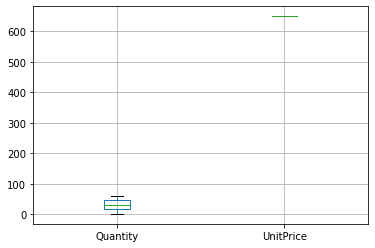

In [99]:
data[data['Description'] == 'PICNIC BASKET WICKER 60 PIECES'][['Quantity', 'UnitPrice']].boxplot()
plt.show()

## Seems like a premium product - high price low volume?? Check the records to confirm

In [101]:
data[data['Description'] == 'PICNIC BASKET WICKER 60 PIECES'][['Quantity', 'UnitPrice']]

## Seems like only 1 transaction corresponding to Quantity = 60 made it the highest revenue generating product. 
## We need to dig deep

,Quantity,UnitPrice
222680,60,649.5
222682,1,649.5


In [74]:
# Lowest revenue generating product. Is our store paying this to amazon to sell the products?
print((product_rev).min())
print(product_rev[product_rev == product_rev.min()])

-6515.308823529413
Description
AMAZON FEE   -6515.308824
Name: Revenue, dtype: float64


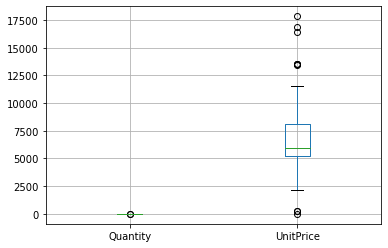

In [100]:
data[data['Description'] == 'AMAZON FEE'][['Quantity', 'UnitPrice']].boxplot()
plt.show()

In [77]:
print(data[data['Description'] == 'AMAZON FEE']['Quantity'].max())
print(data[data['Description'] == 'AMAZON FEE']['Quantity'].min())
print(data[data['Description'] == 'AMAZON FEE']['UnitPrice'].max())
print(data[data['Description'] == 'AMAZON FEE']['UnitPrice'].min())

1
-1
17836.46
1.0


In [109]:
# Removing Amazon fee because that is probably what is the store is paying to amazon for using its platform. It is not a product
data3 = data.drop(data.index[data['Description'] == 'AMAZON FEE'])
data4 = data3.drop(data.index[data['Description'] == 'Adjust bad debt'])

prod_low_rev = data4.groupby('Description')['Revenue'].mean()
print(prod_low_rev[prod_low_rev == prod_low_rev.min()])

Description
CRUK Commission   -495.839375
Name: Revenue, dtype: float64


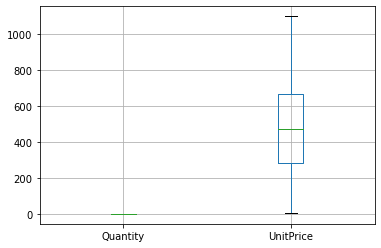

In [110]:
data[data['Description'] == 'CRUK Commission'][['Quantity', 'UnitPrice']].boxplot()
plt.show()

In [111]:
data[data['Description'] == 'CRUK Commission'][['Quantity', 'UnitPrice']]
## Why so volatile prices? Seems like this product has always returned. But how can it be returned if not bought?

,Quantity,UnitPrice
317508,-1,1.60
324023,-1,13.01
333779,-1,15.96
338848,-1,52.24
351003,-1,608.66
361603,-1,447.56
372785,-1,361.59
390002,-1,411.92
401767,-1,495.98
416464,-1,425.14


In [79]:
# Highest priced product
data[data['UnitPrice'] == data['UnitPrice'].max()][['Description', 'UnitPrice']]

,Description,UnitPrice
222681,Manual,38970.0


In [81]:
# Lowest priced product
data2 = data.drop(data.index[data['Description'] == 'Adjust bad debt']) # Dropping 'Adjust bad debt' because it is not a product
data2[data2['UnitPrice'] == data2['UnitPrice'].min()][['Description', 'UnitPrice']]  #All the products priced 0 pounds

,Description,UnitPrice
622,NaN,0.0
1970,NaN,0.0
1971,NaN,0.0
1972,NaN,0.0
1987,NaN,0.0
...,...,...
536981,NaN,0.0
538504,POLYESTER FILLER PAD 45x45cm,0.0
538505,POLYESTER FILLER PAD 40x40cm,0.0
538554,NaN,0.0


In [84]:
data2[data2['UnitPrice'] == data2['UnitPrice'].min()]['Description'].unique().shape

(377,)

In [87]:
prod_vol = data.groupby('Description')['Quantity'].sum()

In [89]:
# Highest sold product
prod_vol[prod_vol == prod_vol.max()]

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53847
Name: Quantity, dtype: int64

In [90]:
# Lowest sold product
prod_vol[prod_vol == prod_vol.min()]

Description
printing smudges/thrown away   -19200
Name: Quantity, dtype: int64

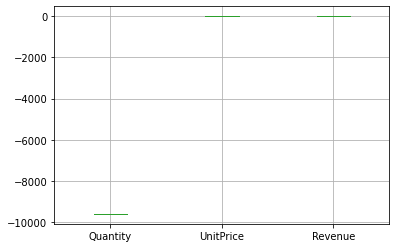

In [92]:
data[data['Description'] == 'printing smudges/thrown away'].boxplot()
plt.show()

## Unique Descriptions per StockCode. How to do this?

In [56]:
## Unique Descriptions per StockCode.
a = data.groupby('StockCode').count()['Description'].(pd.Series.nunique)
(a[a>=2])
print(a.max())
a[a == a.max()].index

2313


Index(['85123A'], dtype='object', name='StockCode')

In [57]:
data[data['StockCode'] == '85123A']['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2302
CREAM HANGING HEART T-LIGHT HOLDER       9
?                                        1
wrongly marked carton 22804              1
Name: Description, dtype: int64

In [59]:
# ARU
(data.groupby(['CustomerID'])['Revenue'].mean()).mean()

28.83486930379861

In [60]:
# Max spend by a customer
(data.groupby(['CustomerID'])['Revenue'].mean()).max()

3861.0

In [64]:
(data.groupby(['CustomerID'])['Revenue'].mean()).min()

-4287.63

# COHORT ANALYSIS

## Time cohorts

### Assigining the acquisition month - The first transaction amde by the customer in the database will be considered as acquisition day. 

In [5]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [8]:
data['InvoiceMonth2'] = data['InvoiceDate'].dt.month
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)

In [10]:
data[['InvoiceMonth', 'InvoiceMonth2']]

,InvoiceMonth,InvoiceMonth2
0,2010-12-01,12
1,2010-12-01,12
2,2010-12-01,12
3,2010-12-01,12
4,2010-12-01,12
...,...,...
541904,2011-12-01,12
541905,2011-12-01,12
541906,2011-12-01,12
541907,2011-12-01,12


In [13]:
group = data.groupby('CustomerID')['InvoiceMonth']
data['CohortMonth'] = group.transform('min')

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth2,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,2010-12-01


#### Calculating time since acquisition

In [16]:
def tenure(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [17]:
# Calculating difference between any transaction and first transaction of each customer i.e. tenure in months
data['Tenure'] = (data['InvoiceMonth'].dt.year - data['CohortMonth'].dt.year)*12 + (data['InvoiceMonth'].dt.month - data['CohortMonth'].dt.month) + 1

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth2,InvoiceMonth,CohortMonth,Tenure
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,2010-12-01,1


### Analyzing retention, quantity, price and revenue trends across different cohorts across their tenure

In [39]:
group = data.groupby(['CohortMonth', 'Tenure'])

#### Calculating the number of customers for every month across their tenure i.e. we want to know how many customers are shopping in the subsequent months since their acquisition

In [40]:
cust_num = group['CustomerID'].apply(pd.Series.nunique)

In [41]:
cust_num

CohortMonth  Tenure
2010-12-01   1         949
             2         363
             3         318
             4         368
             5         342
                      ... 
2011-10-01   2          93
             3          46
2011-11-01   1         321
             2          43
2011-12-01   1          41
Name: CustomerID, Length: 91, dtype: int64

In [43]:
cust_num = cust_num.reset_index()   # Index to column conversion
cust_num

,index,CohortMonth,Tenure,CustomerID
0,0,2010-12-01,1,949
1,1,2010-12-01,2,363
2,2,2010-12-01,3,318
3,3,2010-12-01,4,368
4,4,2010-12-01,5,342
...,...,...,...,...
86,86,2011-10-01,2,93
87,87,2011-10-01,3,46
88,88,2011-11-01,1,321
89,89,2011-11-01,2,43


In [47]:
cohort_count = cust_num.pivot(columns = 'Tenure', index = 'CohortMonth', values = 'CustomerID')
cohort_count

Tenure,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,949.0,363.0,318.0,368.0,342.0,377.0,361.0,337.0,337.0,375.0,355.0,475.0,261.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
cohort_size = cohort_count.iloc[:,0]
cohort_retention = cohort_count.divide(cohort_size, axis = 0)
#(cohort_retention*100).round(1)

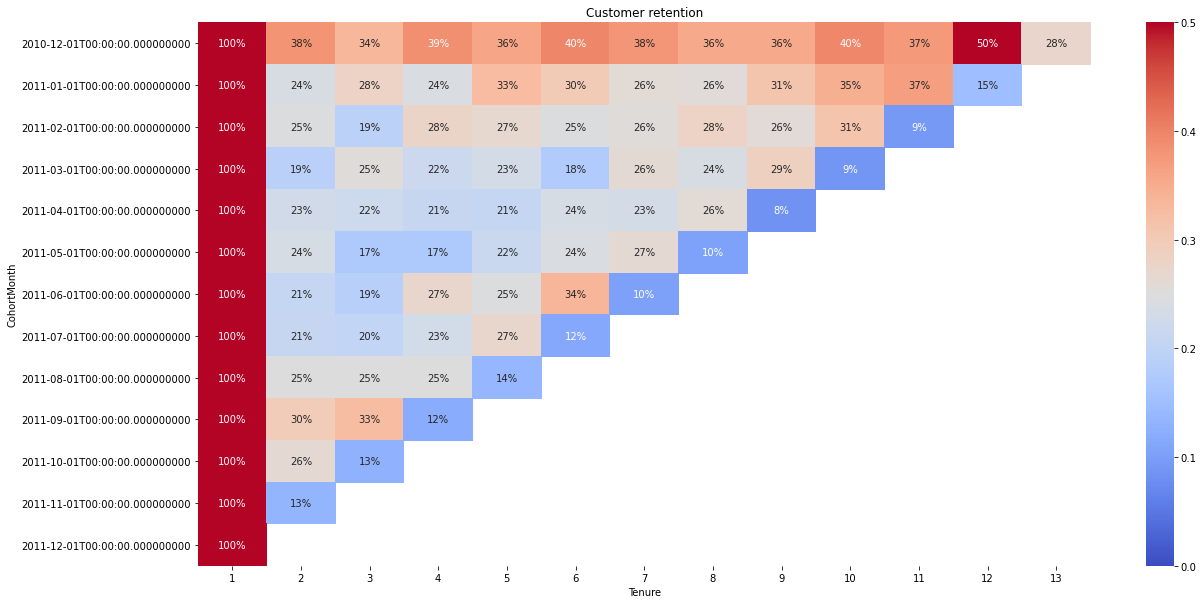

In [87]:
plt.figure(figsize = (20,10))
plt.title('Customer retention')
sns.heatmap(data = cohort_retention, annot = True, fmt = '0.0%', vmin = 0, vmax = 0.5, cmap = 'coolwarm')
plt.show()

#### This graph gives the % of customers who have returned in the subsequent months

In [48]:
#def metric_avg(col):
#    return group[col].mean()

In [58]:
#pivots = []
#for i in ['Quantity', 'UnitPrice', 'Revenue']:
#    metric = metric_avg(i)
#    metric = metric.reset_index() 
#    metric_pivot = metric.pivot(columns = 'Tenure', index = 'CohortMonth', values = i)
#    #print(f"The cohort pivot for {i} is \n {metric_pivot}")
#    pivots.append(metric_pivot)

In [81]:
quantity_avg = group['Quantity'].mean()
quantity_avg = quantity_avg.reset_index()
cohort_quant = quantity_avg.pivot(columns = 'Tenure', index = 'CohortMonth', values = 'Quantity')
cohort_quant_start = cohort_quant.iloc[:,0]
cohort_quant_cont = cohort_quant.divide(cohort_quant_start, axis = 0)
#(cohort_quant_cont*100).round(1)

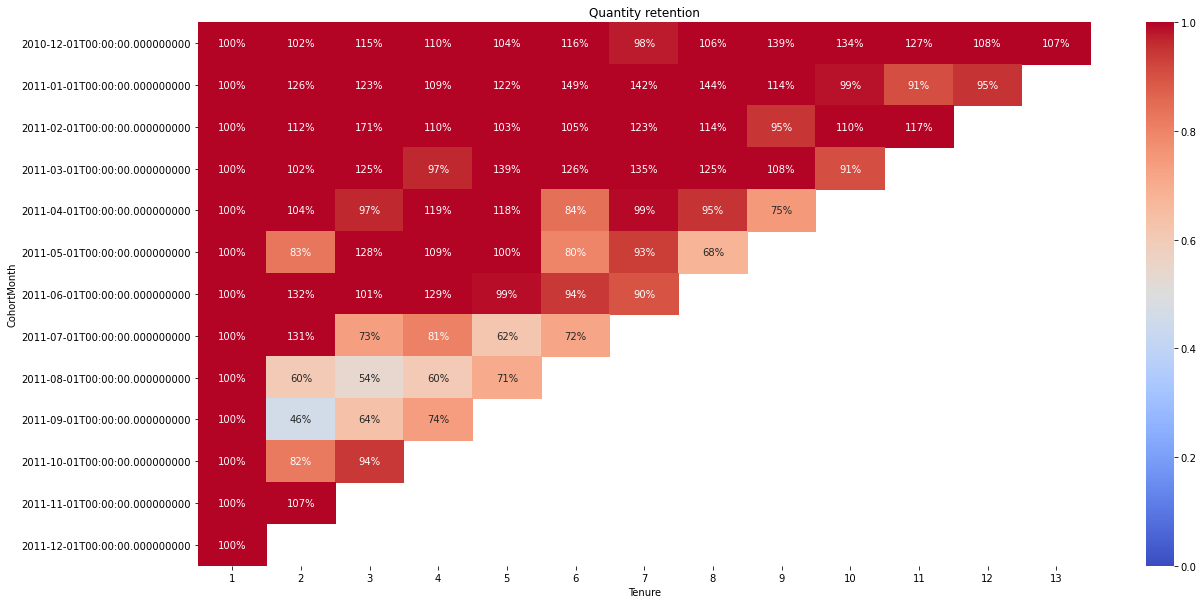

In [79]:
plt.figure(figsize = (20,10))
plt.title('Quantity retention')
sns.heatmap(data = cohort_quant_cont, annot = True, fmt = '0.0%', vmin = 0, vmax = 1, cmap = 'coolwarm')
sns.setxticklabels(data['CohortMonth'].dt.strftime('%d-%m-%Y'))
plt.show()

In [83]:
price_avg = group['UnitPrice'].mean()
price_avg = price_avg.reset_index()
cohort_price = price_avg.pivot(columns = 'Tenure', index = 'CohortMonth', values = 'UnitPrice')
cohort_price_start = cohort_price.iloc[:,0]
cohort_price_cont = cohort_price.divide(cohort_price_start, axis = 0)
#(cohort_price_cont*100).round(1)

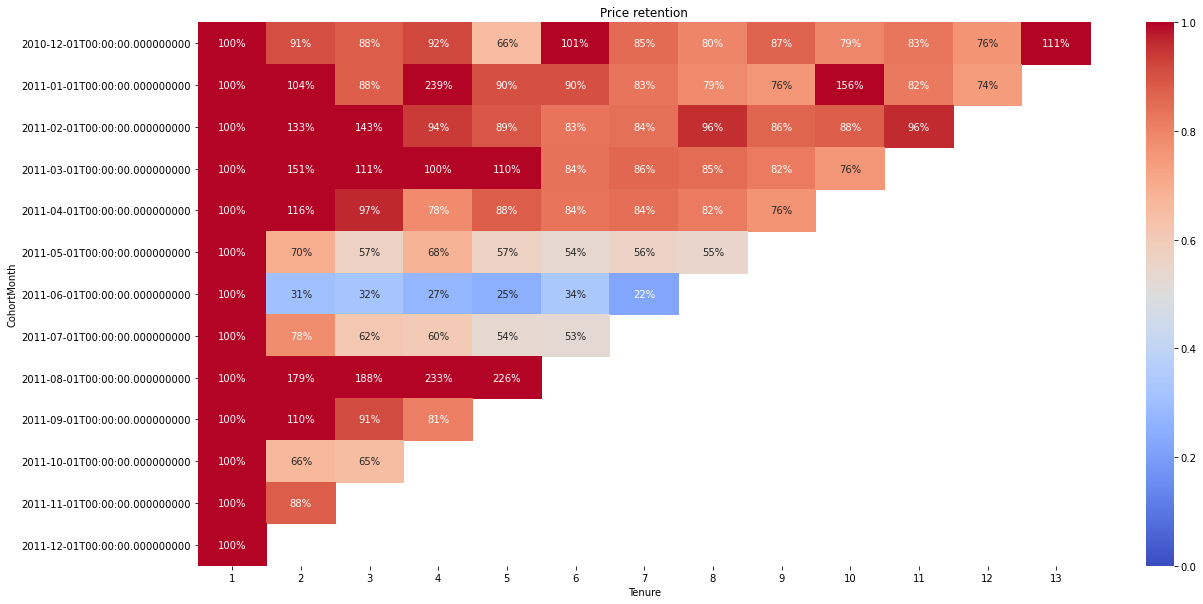

In [90]:
plt.figure(figsize = (20,10))
plt.title('Price retention')
sns.heatmap(data = cohort_price_cont, annot = True, fmt = '0.0%', vmin = 0, vmax = 1, cmap = 'coolwarm')
plt.show()

In [84]:
rev_avg = group['Revenue'].mean()
rev_avg = rev_avg.reset_index()
cohort_rev = rev_avg.pivot(columns = 'Tenure', index = 'CohortMonth', values = 'Revenue')
cohort_rev_start = cohort_rev.iloc[:,0]
cohort_rev_cont = cohort_rev.divide(cohort_rev_start, axis = 0)
#(cohort_rev_cont*100).round(1)

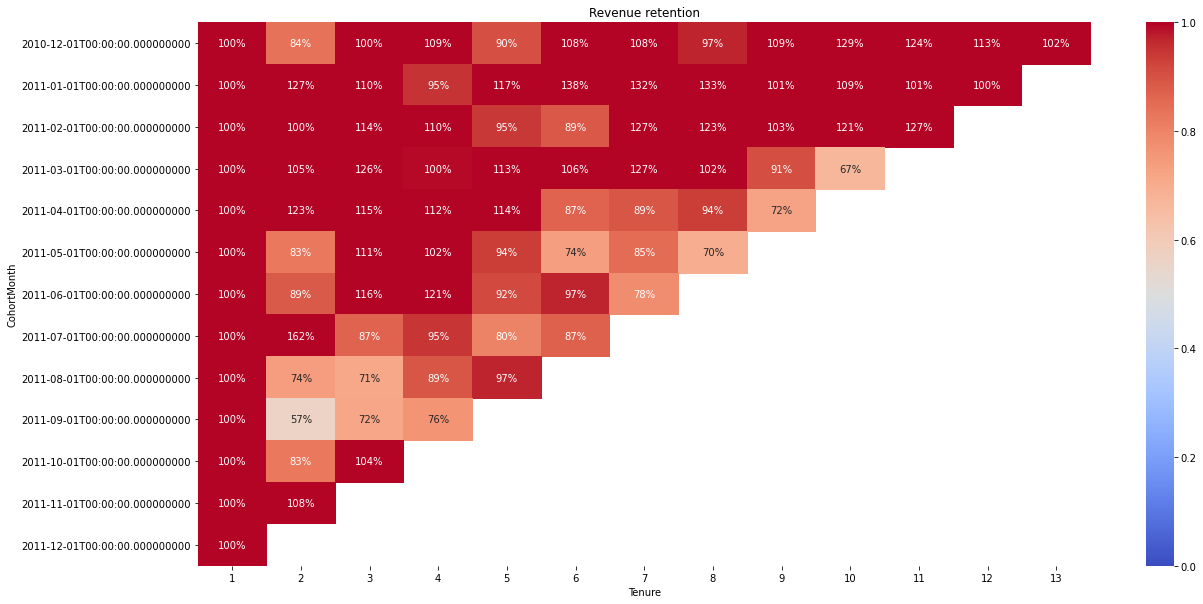

In [85]:
plt.figure(figsize = (20,10))
plt.title('Revenue retention')
sns.heatmap(data = cohort_rev_cont, annot = True, fmt = '0.0%', vmin = 0, vmax = 1, cmap = 'coolwarm')
plt.show()

In [88]:
#### Analyzing all the graphs it looks the organization has gone downhill from May 2011